# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
6240,30334,36486,662,2012,2012_Pres-G_FL,FL,Pres-G,Pres-G,Susquehanna Polling & Research Inc.,326,Live Phone,NaN,10/23/12,1001.0,Barack Obama,16,DEM,46.0,Mitt Romney,9,REP,51.0,NaN,-5.0,11/6/12,50.01,49.13,0.88,-5.88,0.0,for Sunshine State News
7341,34339,42033,1237,2014,2014_Gov-G_NY,NY,Gov-G,Gov-G,Marist College,183,Live Phone,NaN,10/27/14,503.0,Andrew Cuomo,8663,DEM,56.0,Robert P. Astorino,8871,REP,30.0,6.0,26.0,11/4/14,54.28,40.31,13.96,12.04,1.0,for Wall Street Journal | NBC 4 New York
9188,56577,91067,162,2018,2018_Gov-G_TN,TN,Gov-G,Gov-G,Marist College,183,Live Phone,NaN,10/25/18,471.0,Karl F. Dean,11380,DEM,40.0,Bill Lee,11381,REP,57.0,NaN,-17.0,11/6/18,38.55,59.56,-21.01,4.01,1.0,for NBC News
664,6387,117973,2513,2000,2000_House-G_MT-1,MT-1,House-G,House-G,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,10/24/00,628.0,Nancy Keenan,14031,DEM,43.0,Denny Rehberg,14032,REP,46.0,NaN,-3.0,11/7/00,46.28,51.50,-5.22,2.22,1.0,NaN
3297,3021,3683,7333,2008,2008_Pres-R_NH,NH,Pres-P,Pres-R,Research 2000,281,Live Phone,NaN,1/5/08,400.0,John McCain,44,REP,35.0,Mitt Romney,48,REP,29.0,13.0,6.0,1/8/08,37.00,31.56,5.44,NaN,1.0,NaN


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [6]:
# %%R

# df_pres_general <- df %>% 
#     filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only

# # a basic histogram
# ggplot(df_pres_general) +
#     aes(x=bias) +
#     geom_histogram(bins=80) +
#     geom_vline(aes(xintercept=0), color='red') +
#     labs(
#         title='',
#         subtitle=""

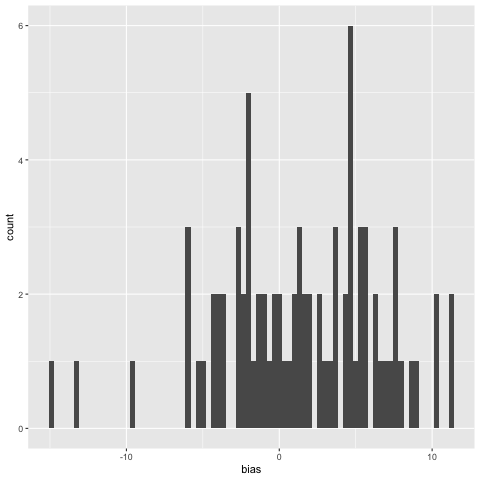

In [7]:
%%R

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias) +
    geom_histogram(bins=80)

In [8]:
df['pollster'] == 'Siena College/The New York Times Upshot'

0        False
1        False
2        False
3        False
4        False
         ...  
10771    False
10772    False
10773    False
10774    False
10775    False
Name: pollster, Length: 10776, dtype: bool

In [9]:
df_siena = df[df.pollster == "Siena College/The New York Times Upshot"]

In [10]:
df_siena.type_detail.value_counts()

House-G    44
Pres-G     17
Sen-G      13
Gov-G       6
Pres-D      1
Sen-OS      1
Sen-GS      1
Name: type_detail, dtype: int64

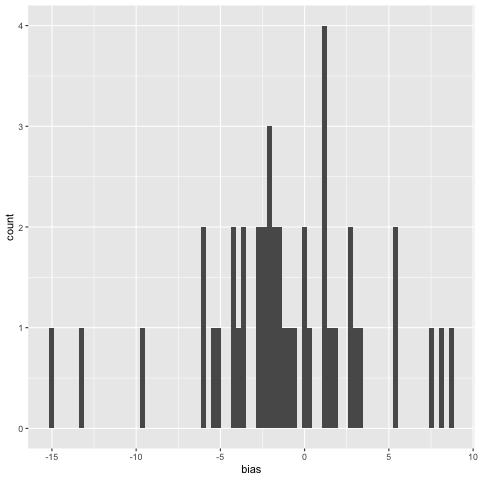

In [11]:
%%R

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot',type_detail=='House-G') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias) +
    geom_histogram(bins=80)

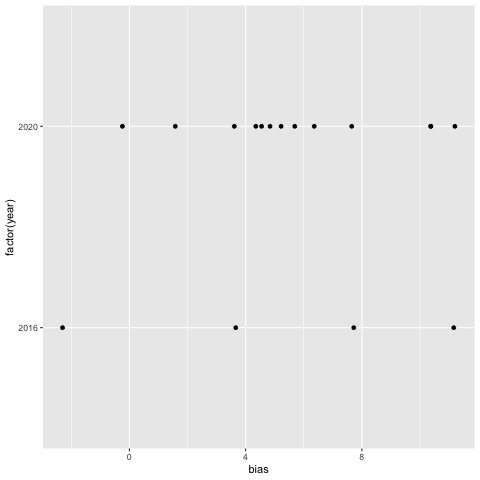

In [12]:
%%R

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot',type_detail=='Pres-G') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias,y=factor(year)) +
    geom_point()

In [13]:
#here we can see that in 2020, most of the polls show bias to democrats.

#In 2020, they were close to being accurate on the General Presidential elections.

👉 **Jayhawk Consulting**

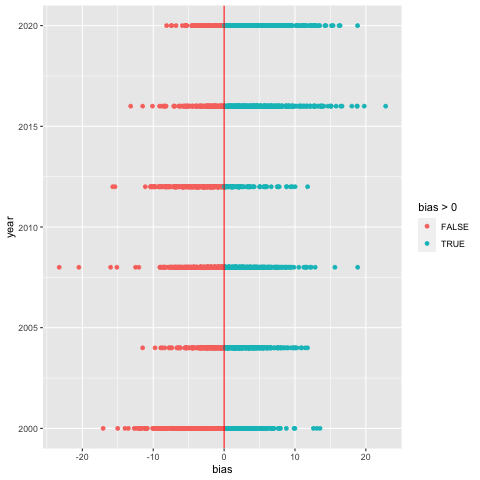

In [17]:
%%R

df_jawhawk <- df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(df_jawhawk) +
    aes(x=bias, y=year, color=bias>0) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [19]:
%%R

df_Fox News/Beacon Research/Shaw & Co. Research <- df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(df_Fox News/Beacon Research/Shaw & Co. Research) +
    aes(x=bias, y=year) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  

RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR

👉 **Brown University**

👉 **American Research Group**

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
